# <center>${\textbf{Artificial Intelligence Decision Support System}}$<br>${\textbf{ for Groundwater Management under Climate Change:}}$</center><br><center>${\textbf{ Application to Mornag Region in Tunisia}}$</center><br><center>${\textbf{Part 4 : Deployment Using XGBoost}}$</center>


**Table of Contents**

* [Importing Libraries](#libraris)
* [Forecasting under Climate Change scenarios](#cc)
    * [Representative Concentration Pathway :RCP 4.5](#rcp4.5_1)
    * [Representative Concentration Pathway :RCP 8.5](#rcp8.5_1)

    

<a id="libraries"></a>

${\textbf{Importing Libraries}}$

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


import xgboost as xgb
import tensorflow as tf

import pickle

import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
XGBModel = pickle.load(open('./Pickles/Models/XGBmodel.pkl', 'rb'))
Historical_Data = pd.read_pickle('./Pickles/Data/Historical_Data.pkl')

<a id="cc"></a>

## ${\textbf{XGBoost Forecasting under Climate Change scenarios}}$

<a id="rcp4.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 4.5 }}$

In [3]:
RCP45 = pd.read_pickle('./Pickles/Data/RCP45.pkl')
del RCP45['MonthlyRF']
RCP45.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [4]:
lb_make = LabelEncoder()
RCP45["Piezometer"] = lb_make.fit_transform(RCP45["Piezometer"])
lb_make1 = LabelEncoder()
RCP45["Pluviometer"] = lb_make1.fit_transform(RCP45["Pluviometer"])
lb_make2 = LabelEncoder()
RCP45["SPI_classes"] = lb_make2.fit_transform(RCP45["SPI_classes"])

In [5]:
dtest = xgb.DMatrix(RCP45)
y_pred = XGBModel.predict(dtest, ntree_limit=XGBModel.best_ntree_limit)

RCP45["Piezometer"] = lb_make.inverse_transform(RCP45["Piezometer"])
RCP45["Pluviometer"] = lb_make1.inverse_transform(RCP45["Pluviometer"])
RCP45["SPI_classes"] = lb_make2.inverse_transform(RCP45["SPI_classes"])
RCP45["Pz"]=y_pred

In [6]:
RCP45

Piezometer           Pluviometer    YearlyRF  SemestrialRF  \
date                                                                          
2009-01-01        Ben Zazia  BEN AROUS I MUNICIPA  411.898182    273.444545   
2009-01-01             Fraj  BEN AROUS I MUNICIPA  411.898182    273.444545   
2009-01-01       Bir El Kif  BEN AROUS I MUNICIPA  411.898182    273.444545   
2009-01-01         El Attar  BEN AROUS I MUNICIPA  411.898182    273.444545   
2009-01-01           Majoul  BEN AROUS I MUNICIPA  411.898182    273.444545   
...                     ...                   ...         ...           ...   
2100-12-01        UCP Ouzra      OUZRA AGRI FLORA  312.445465    149.702278   
2100-12-01     Salah Khamar      OUZRA AGRI FLORA  312.445465    149.702278   
2100-12-01    Haj Hadi Jani      OUZRA AGRI FLORA  312.445465    149.702278   
2100-12-01  Azaiz ben Attia      OUZRA AGRI FLORA  312.445465    149.702278   
2100-12-01           Delagi      OUZRA AGRI FLORA  312.445465    149.702278   

            TrimestrialRF  MonthlyRF  Zone       SPI     SPI_classes  \
date                                                                   
2009-01-01     158.488182  32.587273     4  0.034115  Moderately Wet   
2009-01-01     158.488182  32.587273     4  0.034115  Moderately Wet   
2009-01-01     158.488182  32.587273     4  0.034115  Moderately Wet   
2009-01-01     158.488182  32.587273     4  0.034115  Moderately Wet   
2009-01-01     158.488182  32.587273     4  0.034115  Moderately Wet   
...                   ...        ...   ...       ...             ...   
2100-12-01      97.629775  31.990834     1 -0.000486  Moderately dry   
2100-12-01      97.629775  31.990834     1 -0.000486  Moderately dry   
2100-12-01      97.629775  31.990834     1 -0.000486  Moderately dry   
2100-12-01      97.629775  31.990834     1 -0.000486  Moderately dry   
2100-12-01      97.629775  31.990834     1 -0.000486  Moderately dry   

                  Lat        Lon  Lat_Pluviometer  Lon_Pluviometer  Month  \
date                                                                        
2009-01-01  36.712677  10.296590         36.76500        -10.22111      1   
2009-01-01  36.721854  10.300582         36.76500        -10.22111      1   
2009-01-01  36.717664  10.294973         36.76500        -10.22111      1   
2009-01-01  36.728039  10.314714         36.76500        -10.22111      1   
2009-01-01  36.736674  10.273134         36.76500        -10.22111      1   
...               ...        ...              ...              ...    ...   
2100-12-01  36.650512  10.231095         36.62639        -10.25639     12   
2100-12-01  36.653313  10.191087         36.62639        -10.25639     12   
2100-12-01  36.641648  10.270523         36.62639        -10.25639     12   
2100-12-01  36.644510  10.269331         36.62639        -10.25639     12   
2100-12-01  36.631954  10.166459         36.62639        -10.25639     12   

            Year         Pz  
date                         
2009-01-01  2009  12.225725  
2009-01-01  2009  10.305092  
2009-01-01  2009   5.161557  
2009-01-01  2009 -12.954974  
2009-01-01  2009  -9.450472  
...          ...        ...  
2100-12-01  2100  16.455839  
2100-12-01  2100  18.599888  
2100-12-01  2100  20.617537  
2100-12-01  2100  18.532646  
2100-12-01  2100  26.779242  

[172224 rows x 16 columns]

Majoul


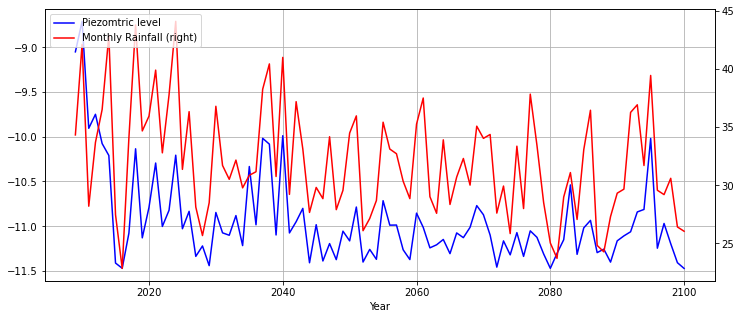

Puits public_6582


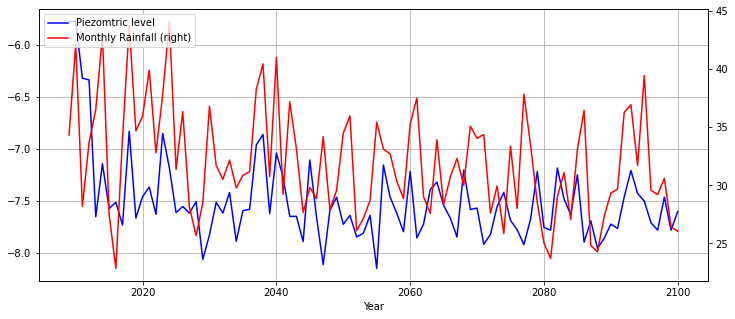

Delagi


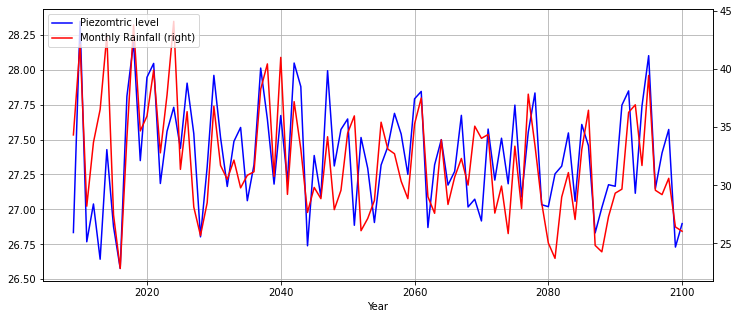

Bel Hassen Sahli


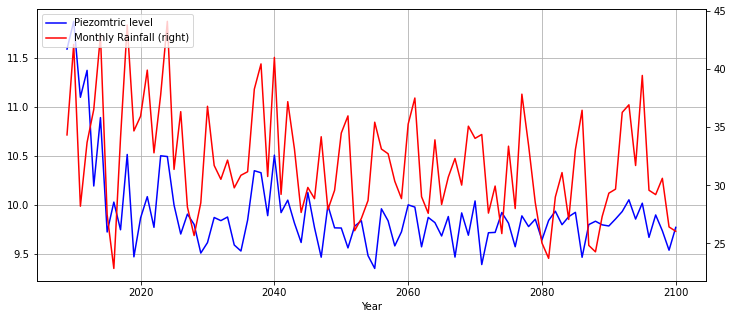

Puit OTD


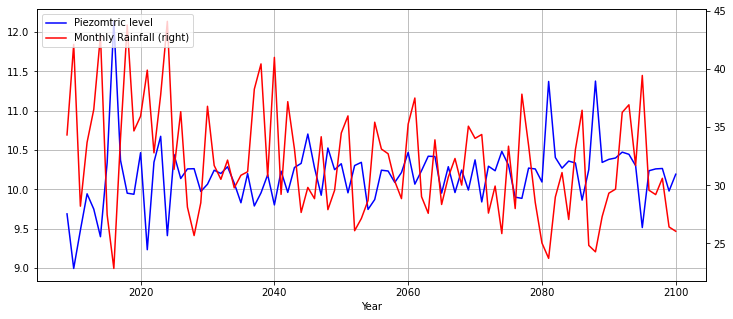

Hachmi Allagui


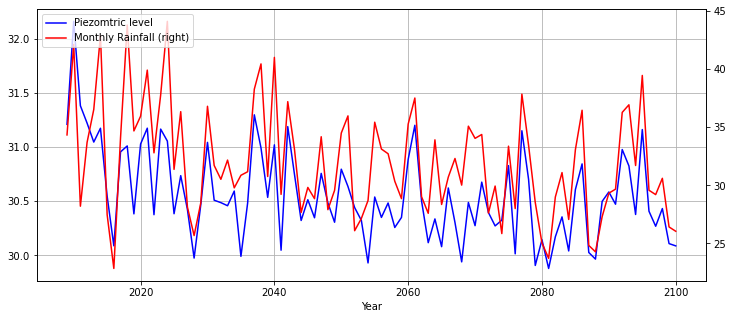

UCP Errissala_620


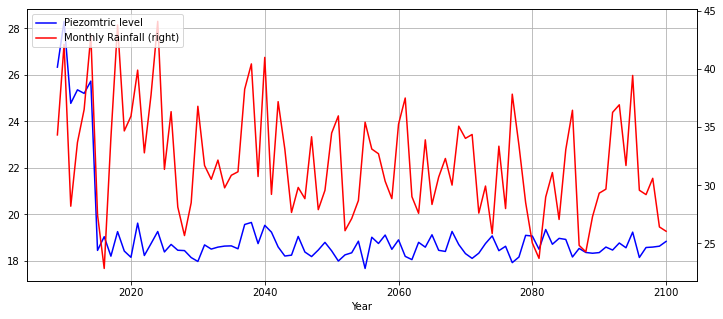

Mohamed Ben Nouiji


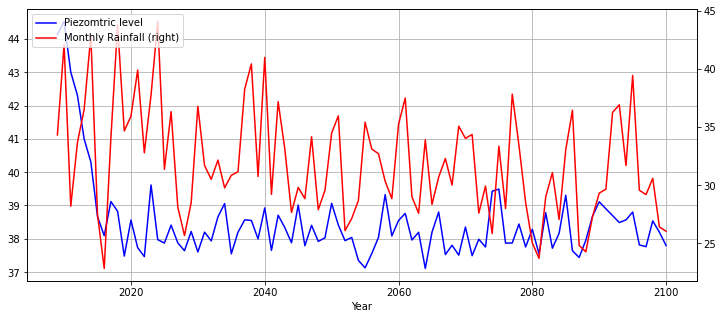

UCP Ouzra


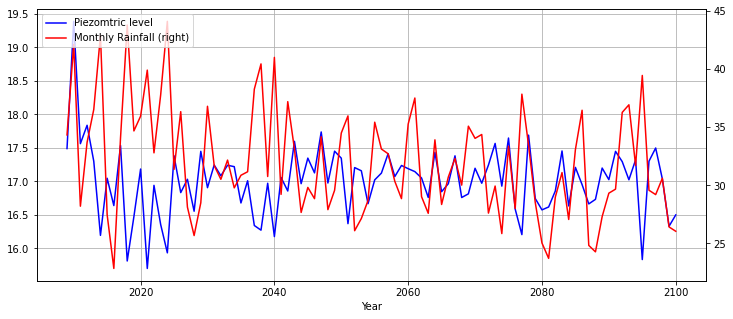

Fraj


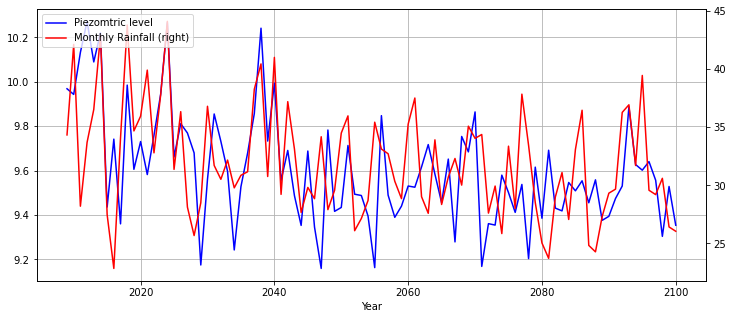

B. Abdallah


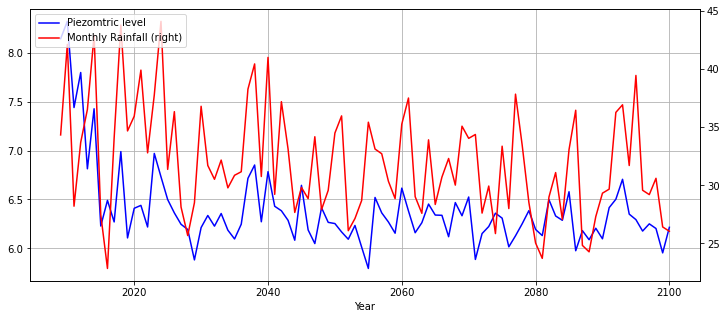

Salah Meziene


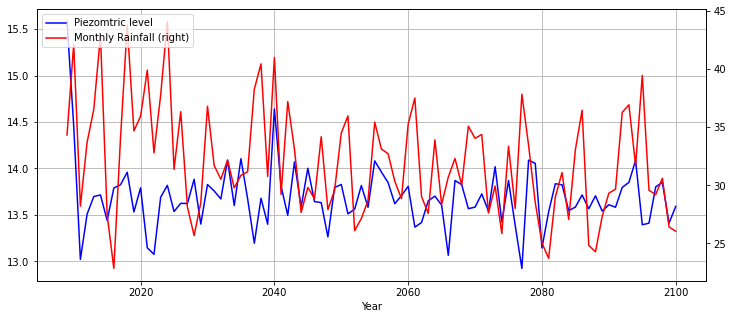

UCP Errissala_B


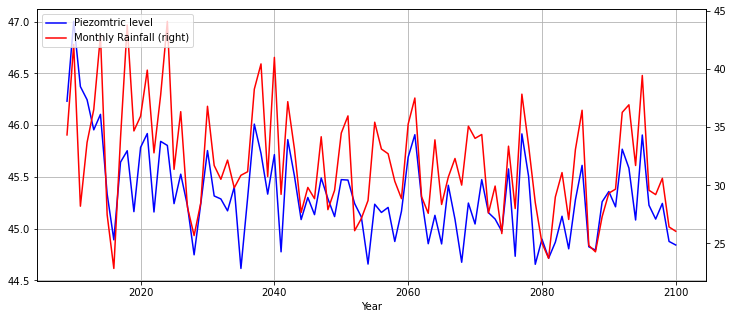

Mohamed Boutnini


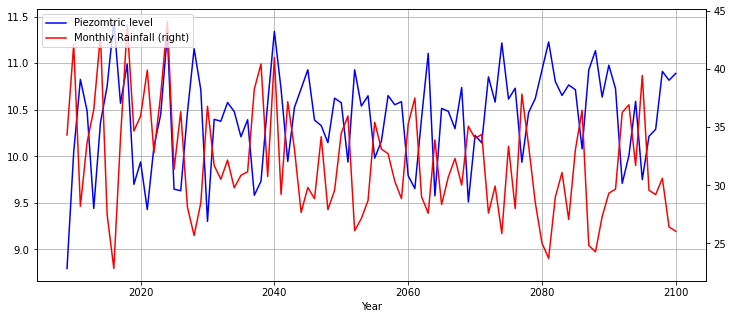

Haj Meftah Allagui


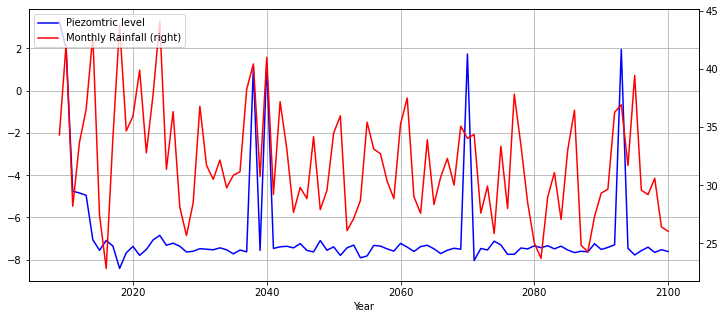

Hamadi Belarbi


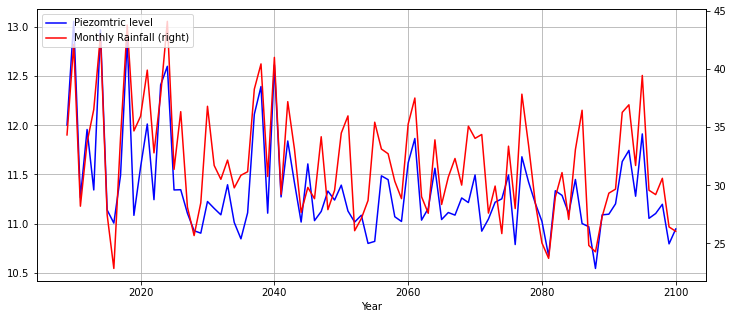

Huritier Sgaier


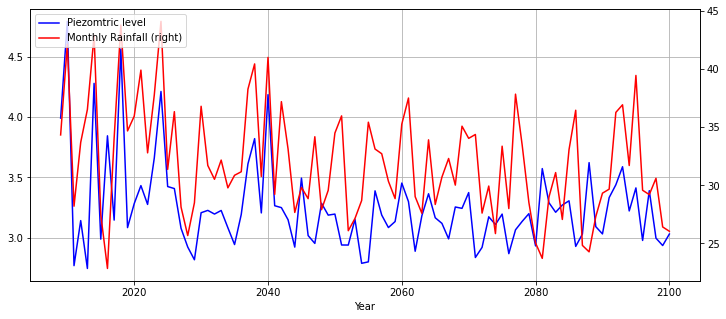

Ali Hanzouti


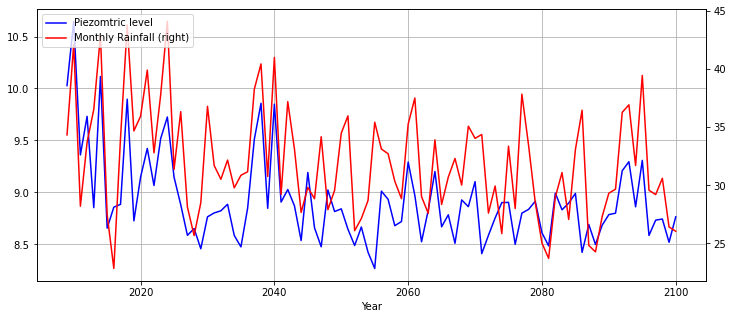

Haj Hadi Jani


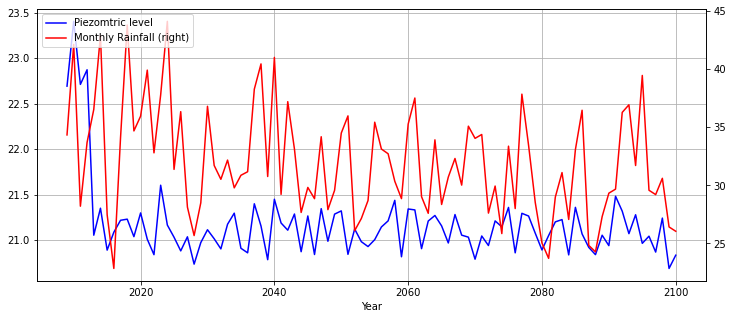

Ali El Almi


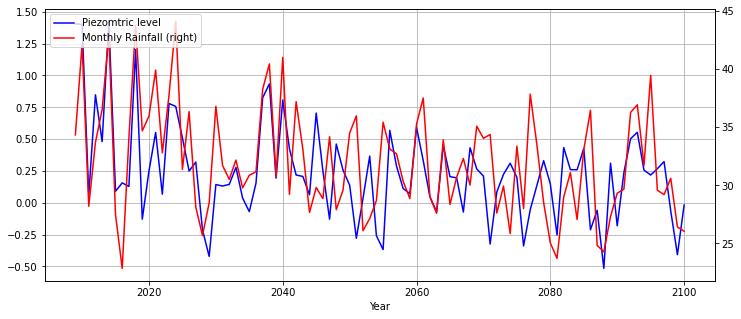

Puits Public_3292


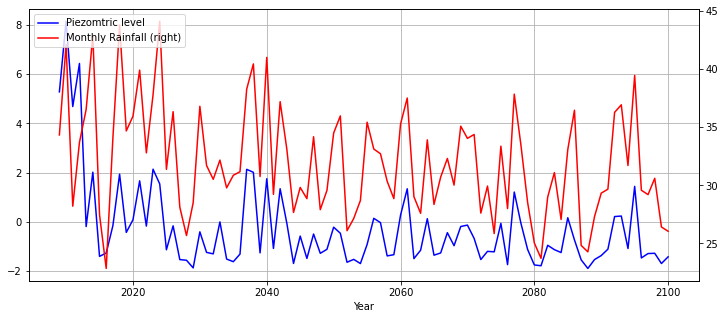

UCP Ennajah_484


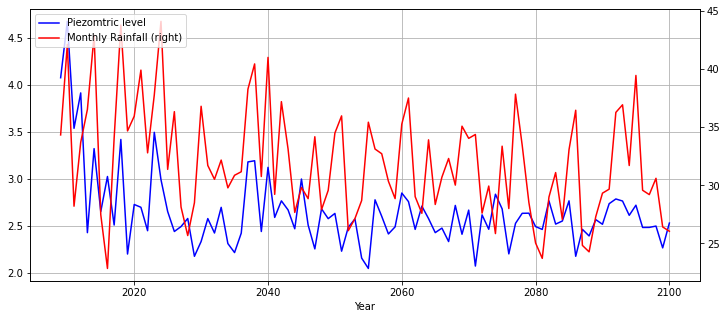

Ecole de Police


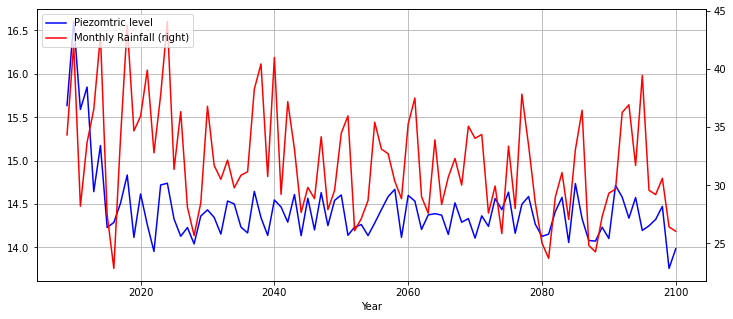

Ben Khalifa


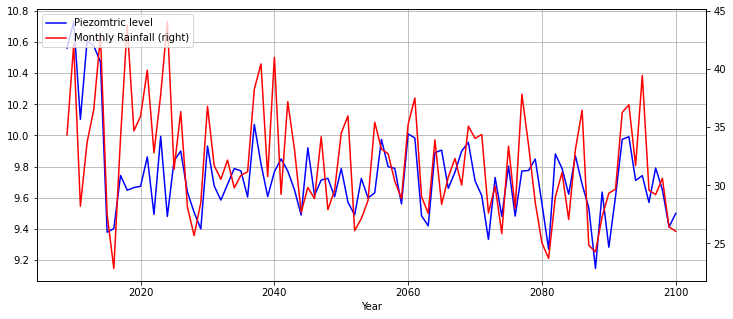

Salah Khamar


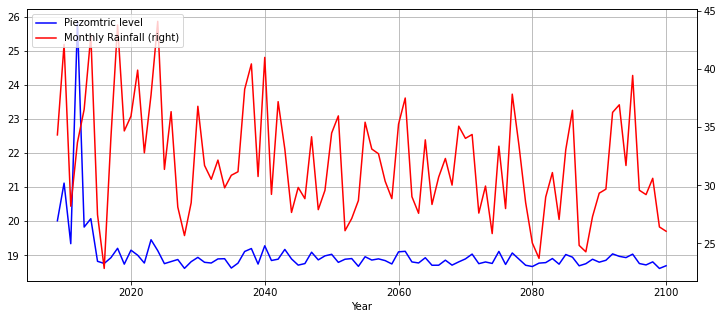

El Attar


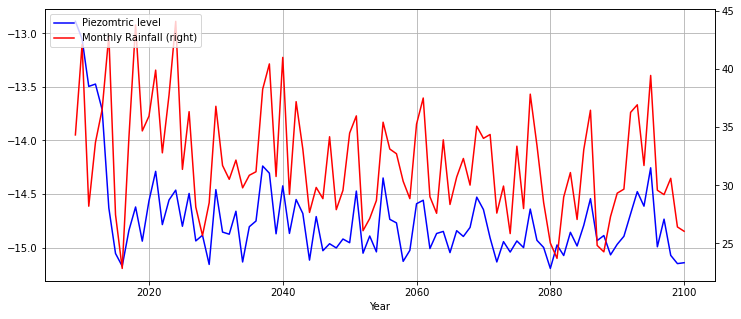

Bir El Kif


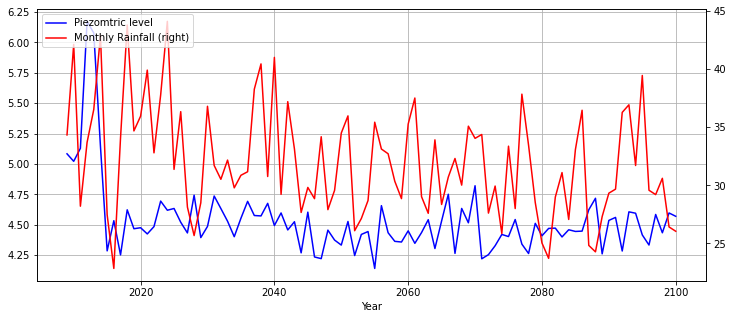

INAT Zaouia


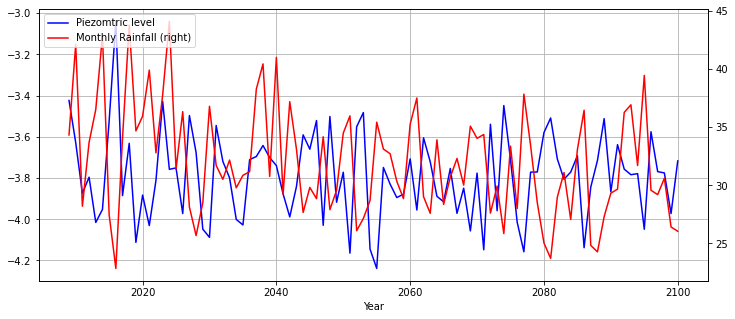

Puits Barrouta


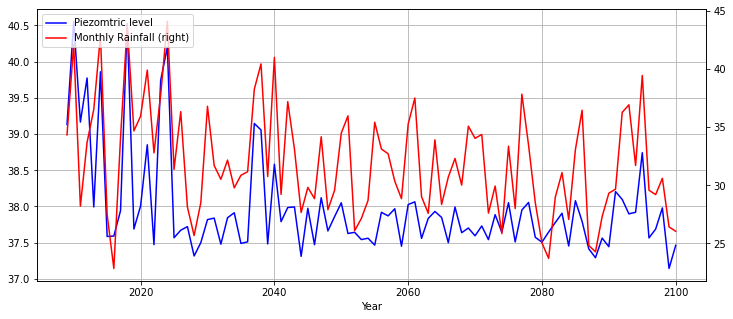

Naceur Dababi


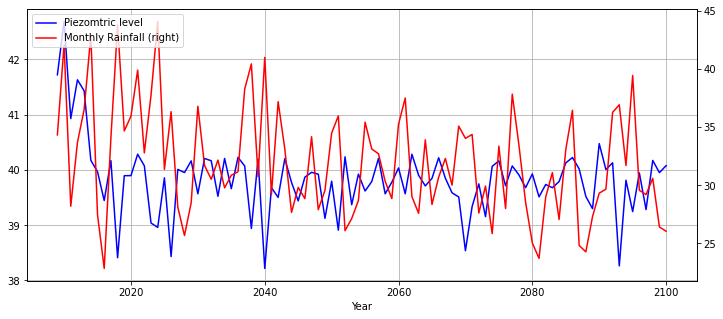

Mzabi


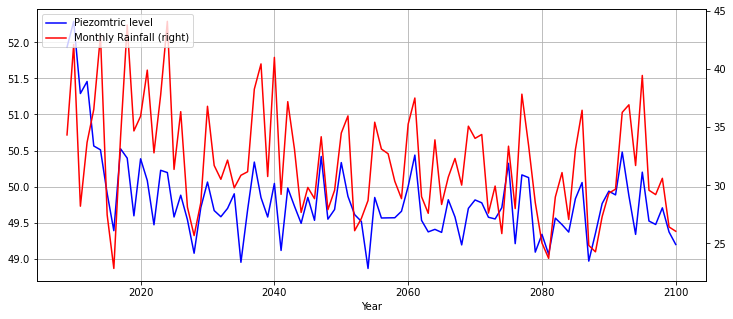

UCP Sidi Daoud


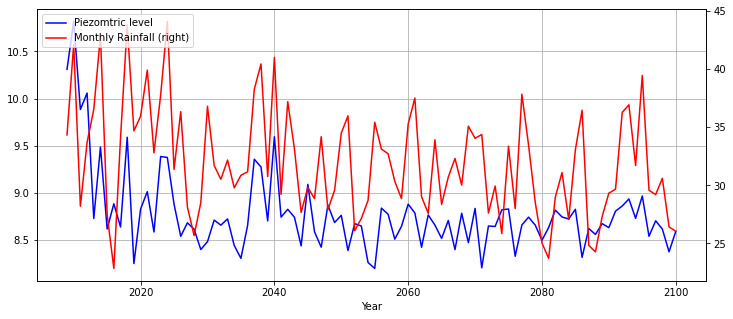

Azzouz El Bahri 1


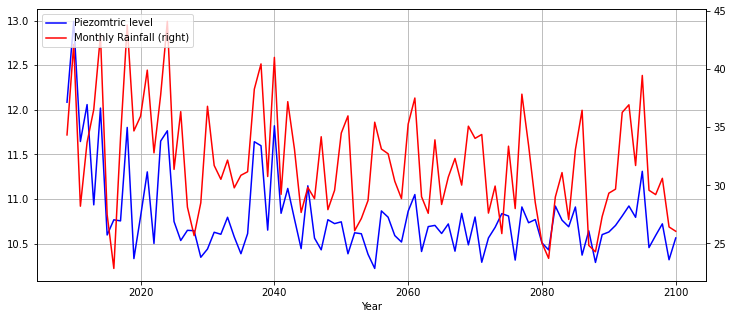

Ali et Med Bel Arbi


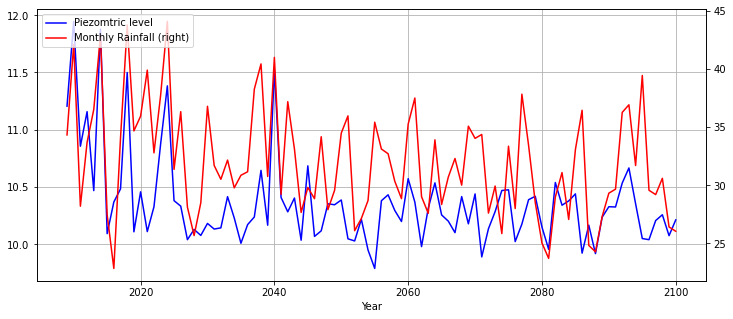

G.O.V.P.F


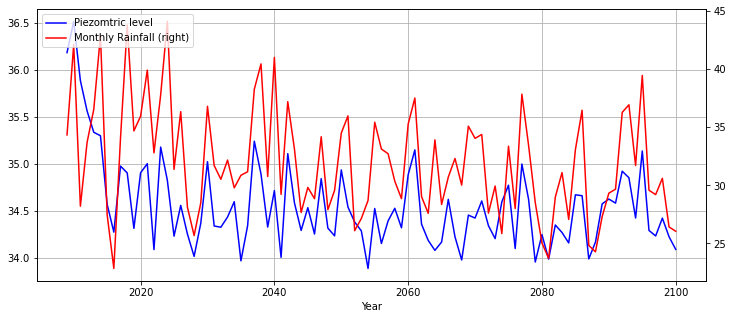

Usine Curamique


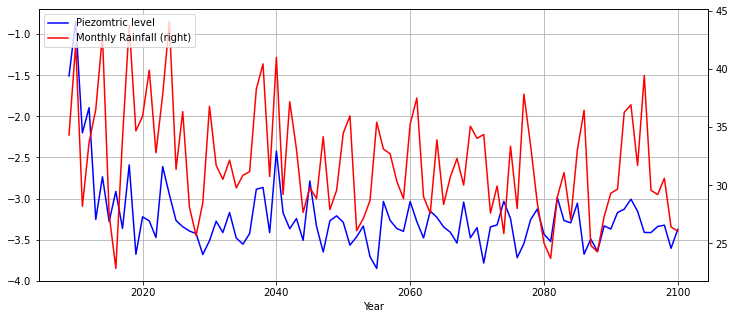

Puits Public_5779


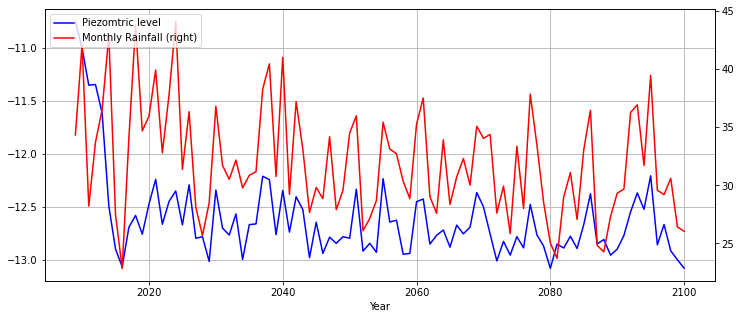

Azaiz ben Attia


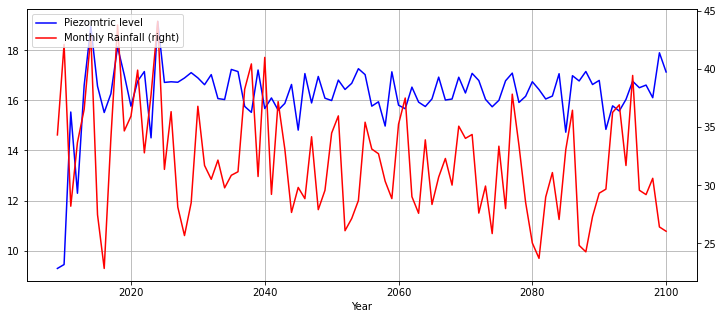

Ben Saad


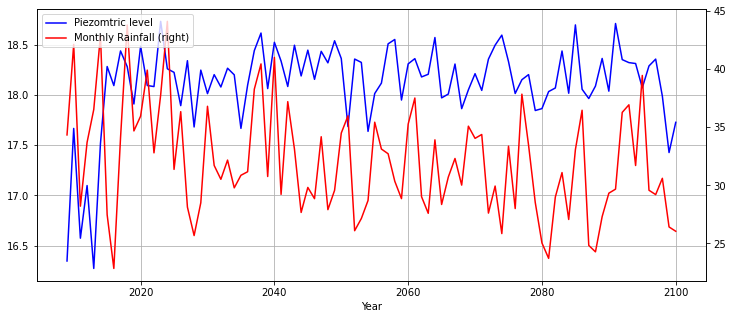

Sadok Belaid


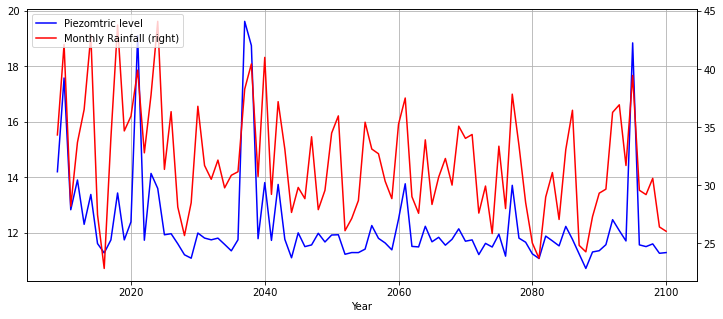

INRAT


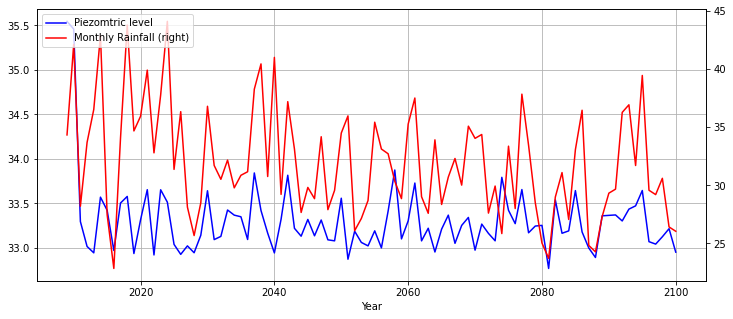

UCP Ennajah_494


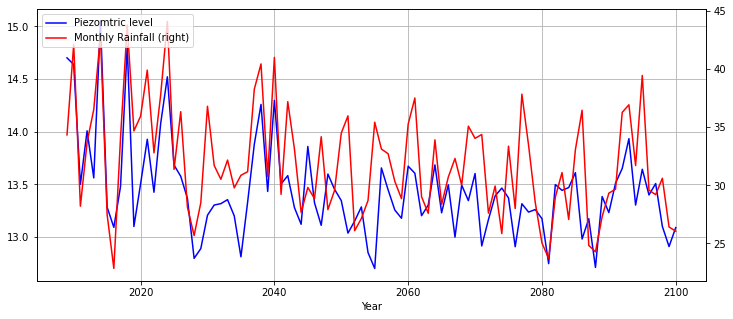

Mohamed ben Rouis


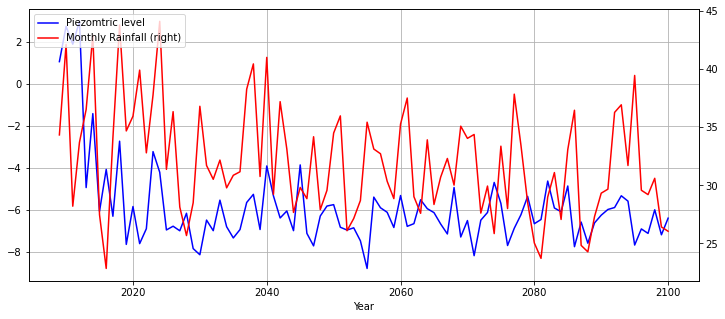

Ben Zazia


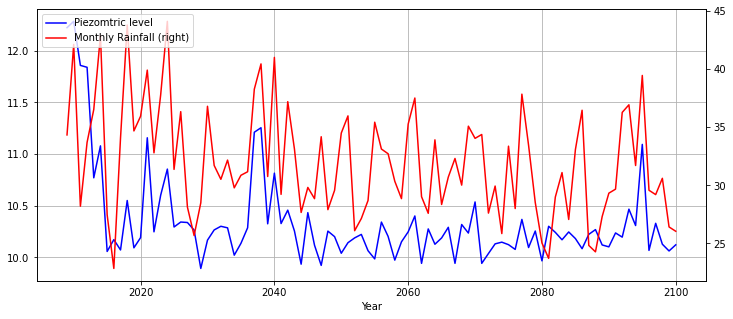

In [7]:
list_nom = list(set(RCP45['Piezometer']))
# plt.rcParams['font.size'] = '16'
for d in list_nom:
    df=RCP45[RCP45.Piezometer==d]
    print(d)
    df=df.reset_index()
    df.index=df.date
    plt.figure(figsize=(12,5))
    plt.xlabel('Number of requests every 10 minutes')

    ax1 = df.groupby('Year')['Pz'].mean().plot(color='blue', grid=True, label='Piezomtric level')
    ax2 = df.groupby('Year')['MonthlyRF'].mean().plot(color='red', grid=True, secondary_y=True, label='Monthly Rainfall')
    
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()


    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()

<a id="rcp8.5_1"></a>

>${\textbf{Representative Concentration Pathway :RCP 8.5}}$

In [8]:
RCP85 = pd.read_pickle('./Pickles/Data/RCP85.pkl')
del RCP85['MonthlyRF']
RCP85.rename(columns = {'Mean':'MonthlyRF'}, inplace = True)#Renaming Zone_num to zone for more clarity

In [9]:
lb_make = LabelEncoder()
RCP85["Piezometer"] = lb_make.fit_transform(RCP85["Piezometer"])
lb_make1 = LabelEncoder()
RCP85["Pluviometer"] = lb_make1.fit_transform(RCP85["Pluviometer"])
lb_make2 = LabelEncoder()
RCP85["SPI_classes"] = lb_make2.fit_transform(RCP85["SPI_classes"])

In [10]:
dtest = xgb.DMatrix(RCP85)
y_pred = XGBModel.predict(dtest, ntree_limit=XGBModel.best_ntree_limit)
RCP85["Piezometer"] = lb_make.inverse_transform(RCP85["Piezometer"])
RCP85["Pluviometer"] = lb_make1.inverse_transform(RCP85["Pluviometer"])
RCP85["SPI_classes"] = lb_make2.inverse_transform(RCP85["SPI_classes"])
RCP85["Pz"]=y_pred

In [11]:
RCP85

Piezometer           Pluviometer    YearlyRF  SemestrialRF  \
date                                                                          
2009-01-01        Ben Zazia  BEN AROUS I MUNICIPA  354.381818    216.021818   
2009-01-01             Fraj  BEN AROUS I MUNICIPA  354.381818    216.021818   
2009-01-01       Bir El Kif  BEN AROUS I MUNICIPA  354.381818    216.021818   
2009-01-01         El Attar  BEN AROUS I MUNICIPA  354.381818    216.021818   
2009-01-01           Majoul  BEN AROUS I MUNICIPA  354.381818    216.021818   
...                     ...                   ...         ...           ...   
2100-12-01        UCP Ouzra      OUZRA AGRI FLORA  287.226304    132.698606   
2100-12-01     Salah Khamar      OUZRA AGRI FLORA  287.226304    132.698606   
2100-12-01    Haj Hadi Jani      OUZRA AGRI FLORA  287.226304    132.698606   
2100-12-01  Azaiz ben Attia      OUZRA AGRI FLORA  287.226304    132.698606   
2100-12-01           Delagi      OUZRA AGRI FLORA  287.226304    132.698606   

            TrimestrialRF  MonthlyRF  Zone       SPI     SPI_classes  \
date                                                                   
2009-01-01     134.808182  28.776364     4 -0.117682  Moderately dry   
2009-01-01     134.808182  28.776364     4 -0.117682  Moderately dry   
2009-01-01     134.808182  28.776364     4 -0.117682  Moderately dry   
2009-01-01     134.808182  28.776364     4 -0.117682  Moderately dry   
2009-01-01     134.808182  28.776364     4 -0.117682  Moderately dry   
...                   ...        ...   ...       ...             ...   
2100-12-01      84.353849  27.523707     1 -0.192284  Moderately dry   
2100-12-01      84.353849  27.523707     1 -0.192284  Moderately dry   
2100-12-01      84.353849  27.523707     1 -0.192284  Moderately dry   
2100-12-01      84.353849  27.523707     1 -0.192284  Moderately dry   
2100-12-01      84.353849  27.523707     1 -0.192284  Moderately dry   

                  Lat        Lon  Lat_Pluviometer  Lon_Pluviometer  Month  \
date                                                                        
2009-01-01  36.712677  10.296590         36.76500        -10.22111      1   
2009-01-01  36.721854  10.300582         36.76500        -10.22111      1   
2009-01-01  36.717664  10.294973         36.76500        -10.22111      1   
2009-01-01  36.728039  10.314714         36.76500        -10.22111      1   
2009-01-01  36.736674  10.273134         36.76500        -10.22111      1   
...               ...        ...              ...              ...    ...   
2100-12-01  36.650512  10.231095         36.62639        -10.25639     12   
2100-12-01  36.653313  10.191087         36.62639        -10.25639     12   
2100-12-01  36.641648  10.270523         36.62639        -10.25639     12   
2100-12-01  36.644510  10.269331         36.62639        -10.25639     12   
2100-12-01  36.631954  10.166459         36.62639        -10.25639     12   

            Year         Pz  
date                         
2009-01-01  2009  11.336246  
2009-01-01  2009   9.052661  
2009-01-01  2009   4.394948  
2009-01-01  2009 -13.538100  
2009-01-01  2009 -10.044469  
...          ...        ...  
2100-12-01  2100  16.510132  
2100-12-01  2100  18.571562  
2100-12-01  2100  20.676027  
2100-12-01  2100  18.193798  
2100-12-01  2100  26.698626  

[172224 rows x 16 columns]

Majoul


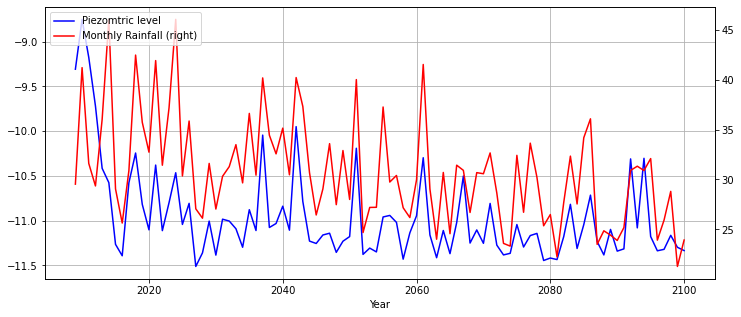

Puits public_6582


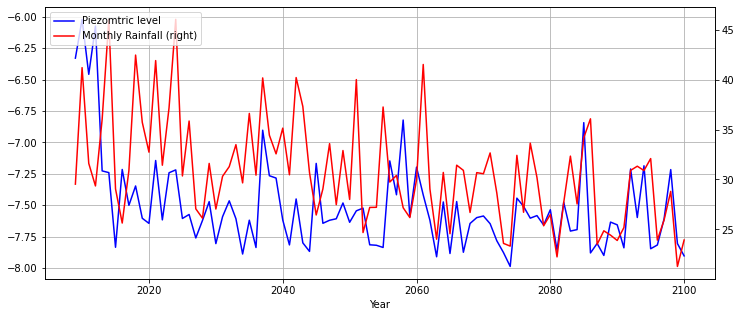

Delagi


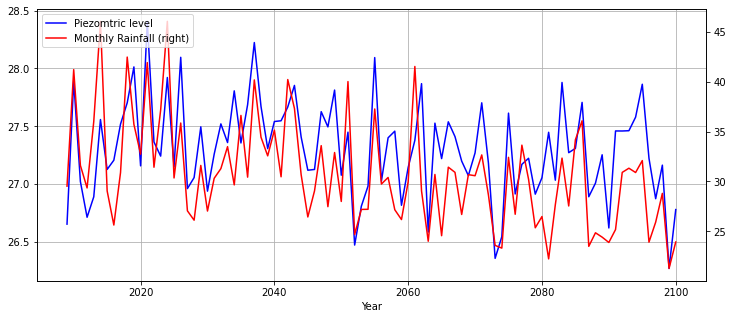

Bel Hassen Sahli


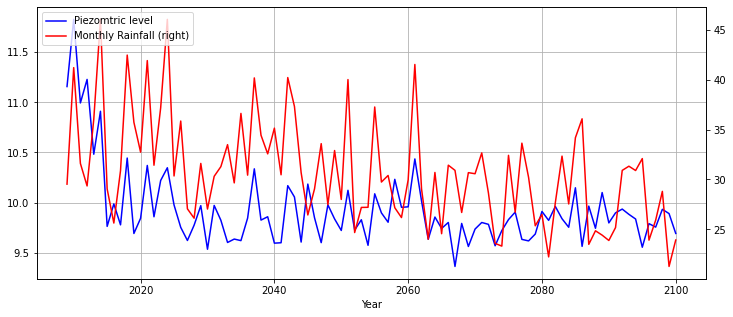

Puit OTD


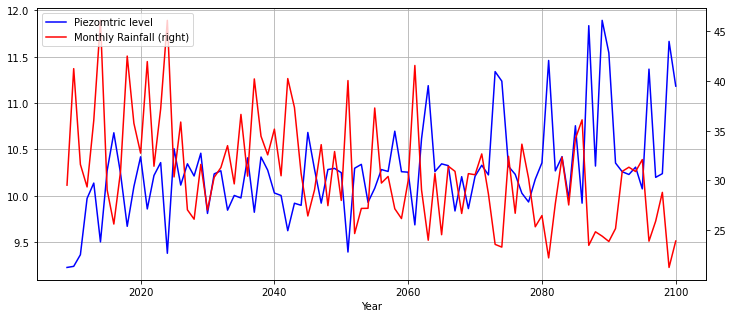

Hachmi Allagui


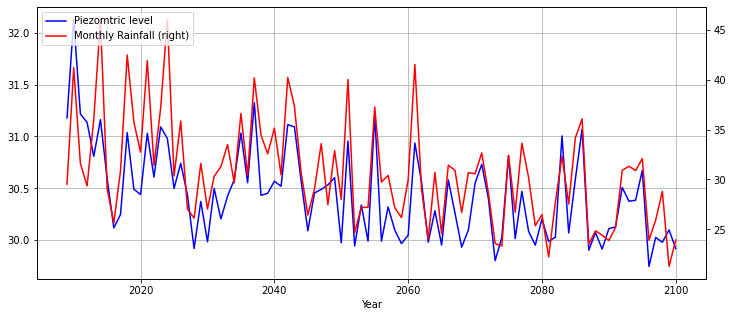

UCP Errissala_620


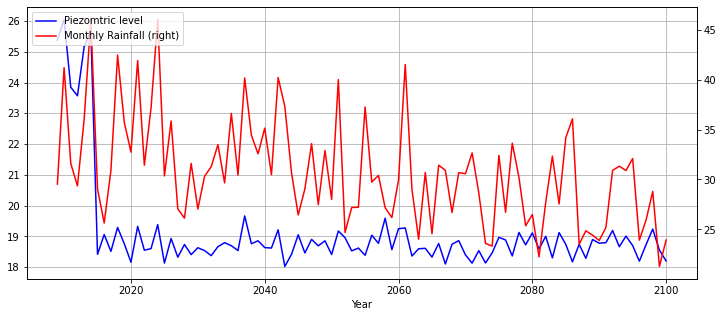

Mohamed Ben Nouiji


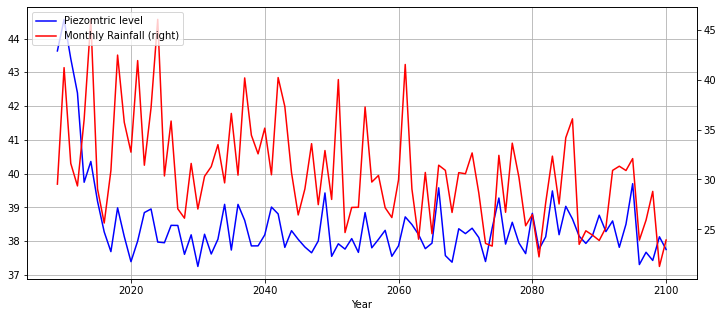

UCP Ouzra


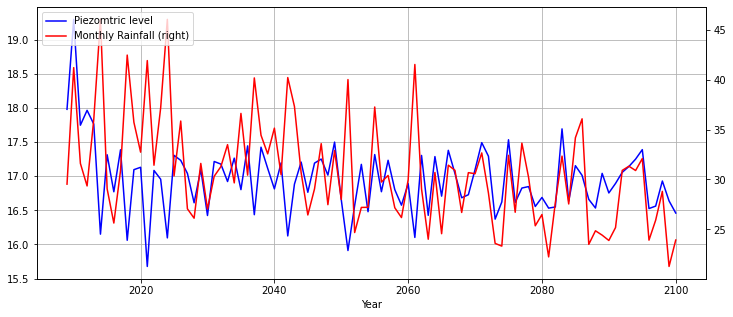

Fraj


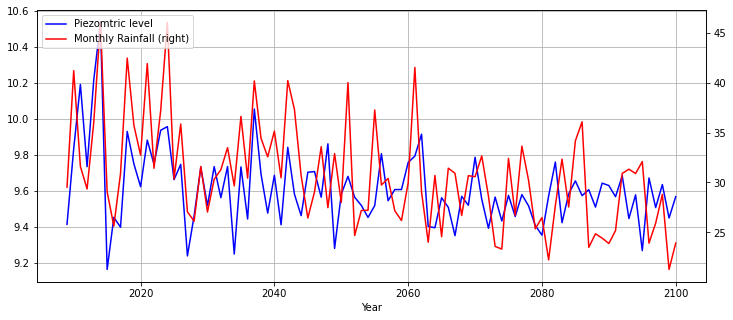

B. Abdallah


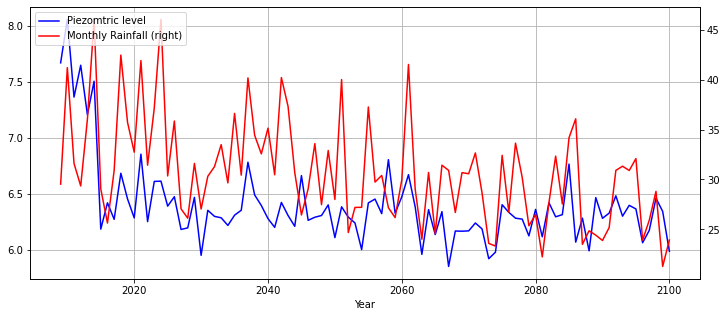

Salah Meziene


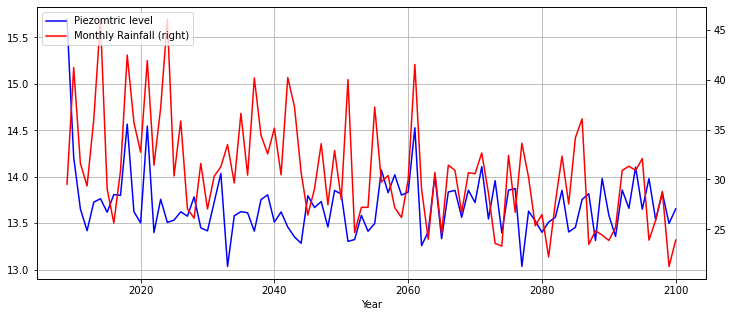

UCP Errissala_B


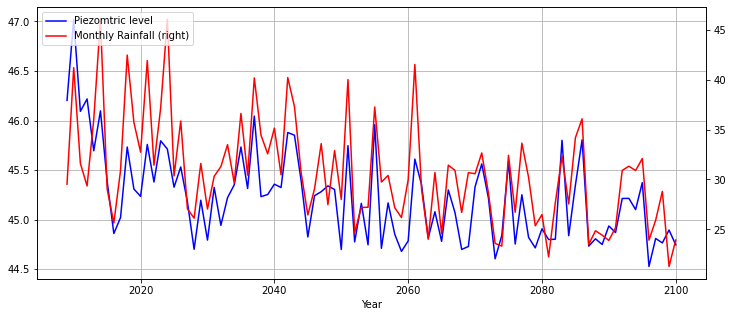

Mohamed Boutnini


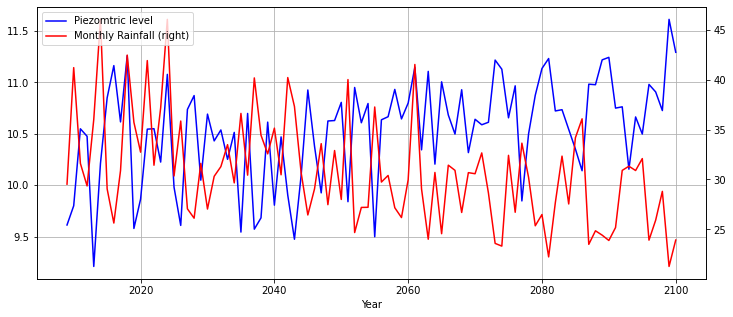

Haj Meftah Allagui


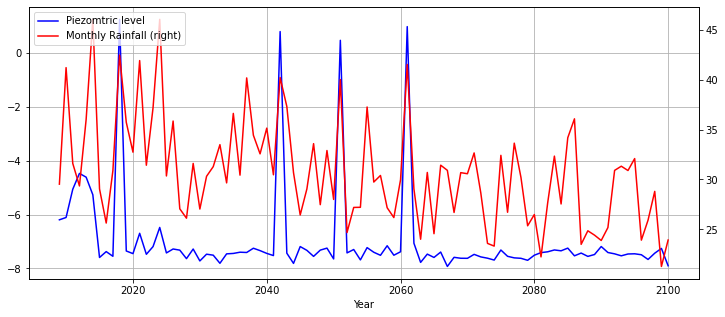

Hamadi Belarbi


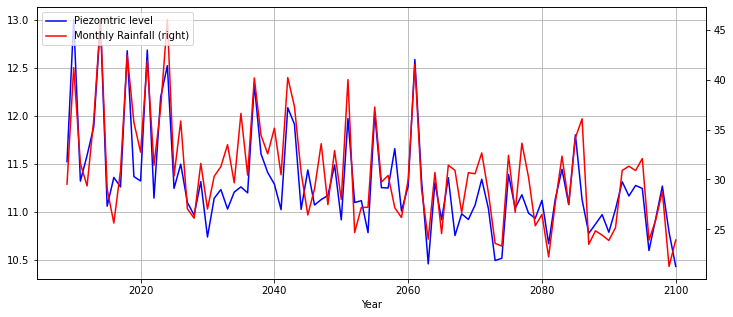

Huritier Sgaier


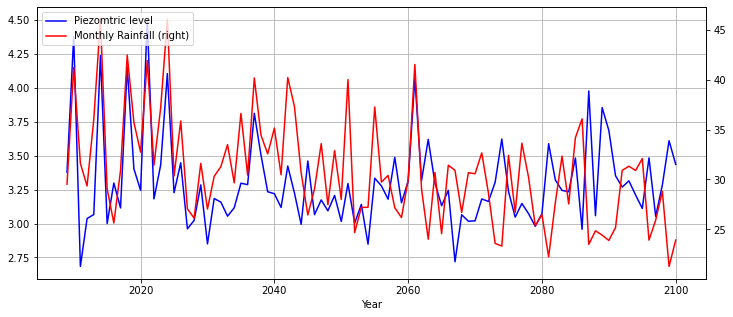

Ali Hanzouti


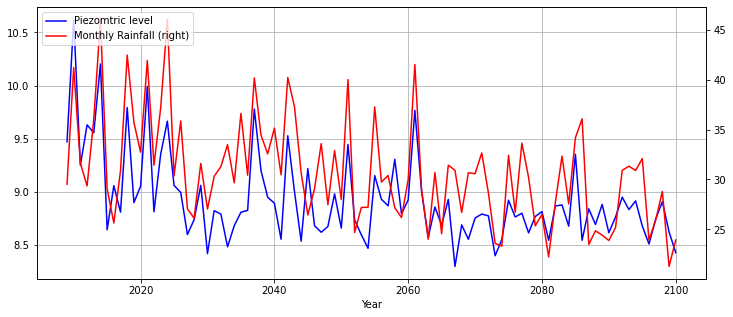

Haj Hadi Jani


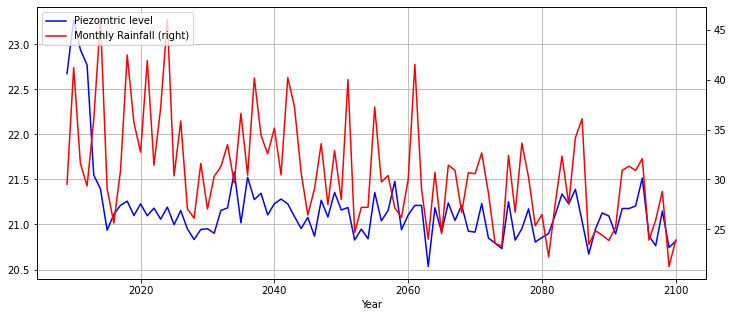

Ali El Almi


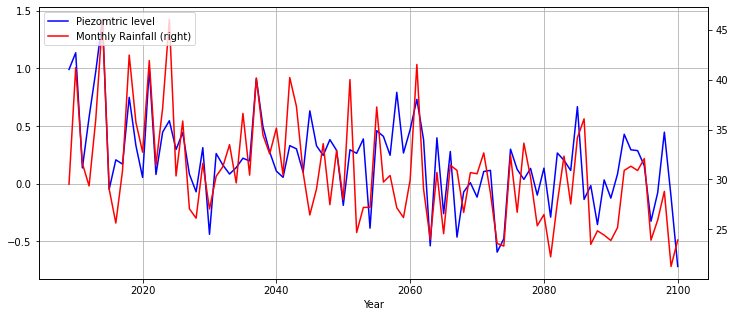

Puits Public_3292


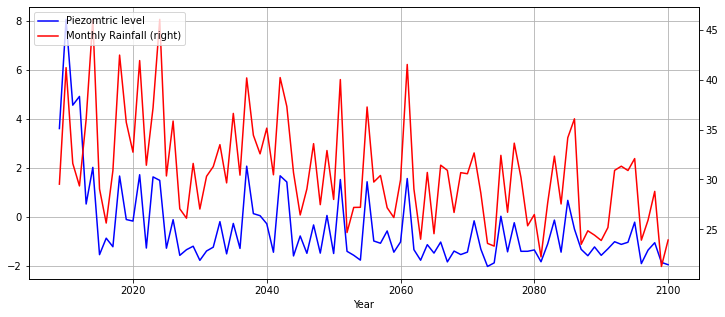

UCP Ennajah_484


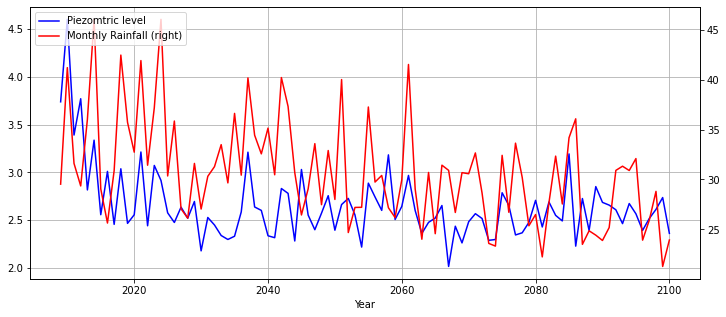

Ecole de Police


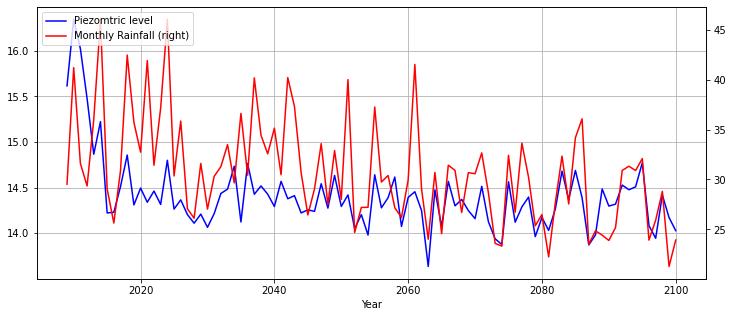

Ben Khalifa


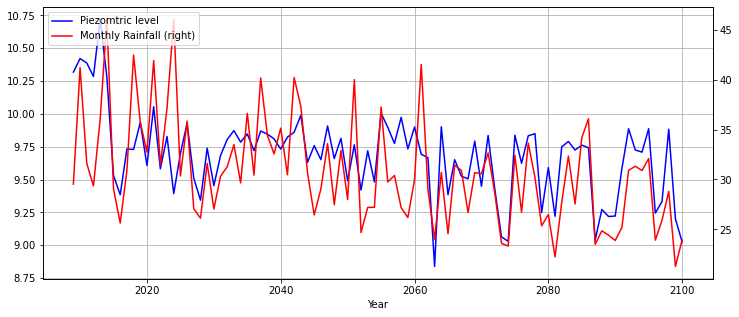

Salah Khamar


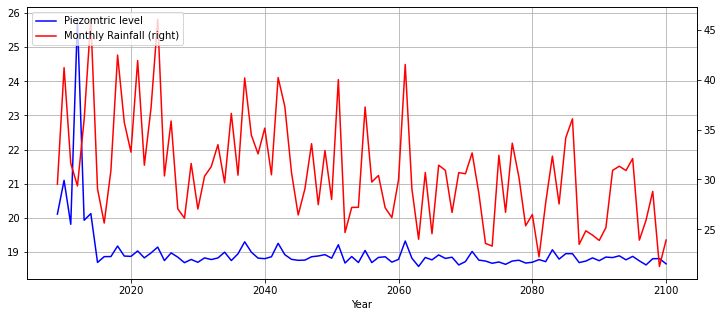

El Attar


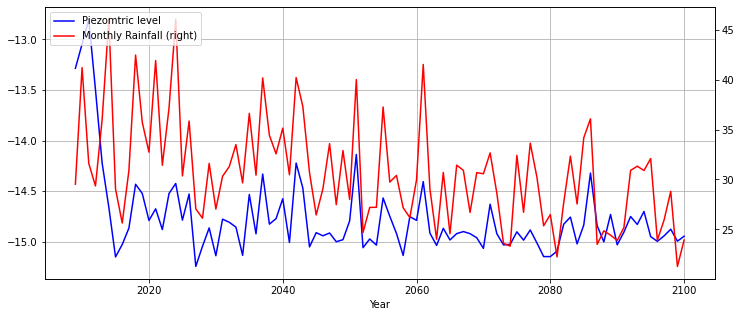

Bir El Kif


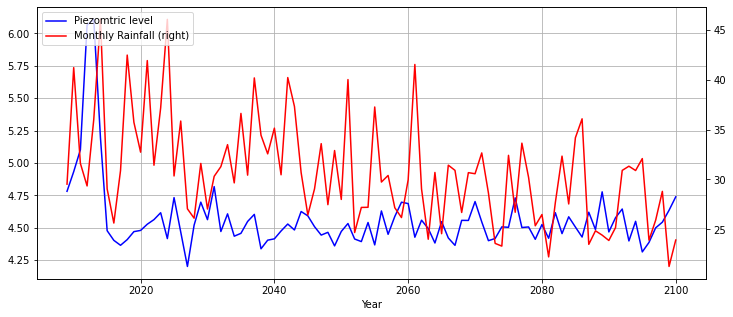

INAT Zaouia


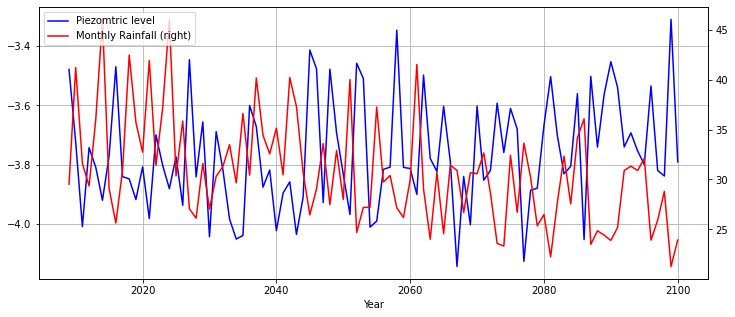

Puits Barrouta


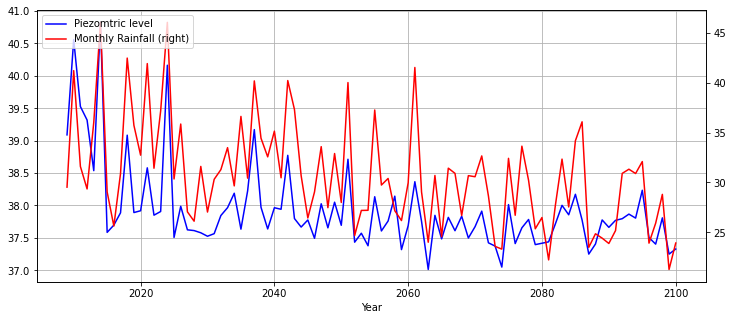

Naceur Dababi


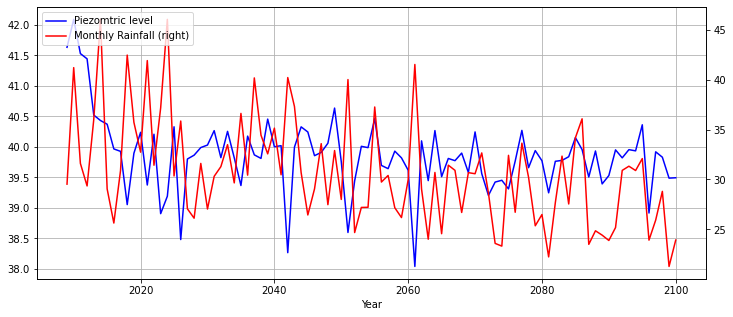

Mzabi


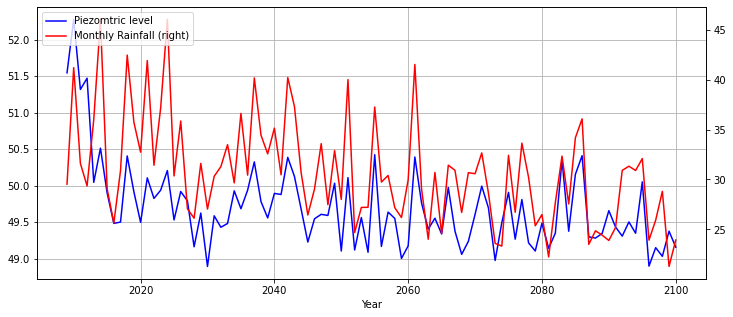

UCP Sidi Daoud


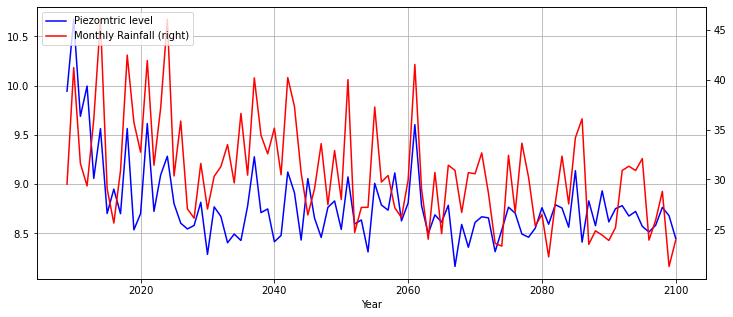

Azzouz El Bahri 1


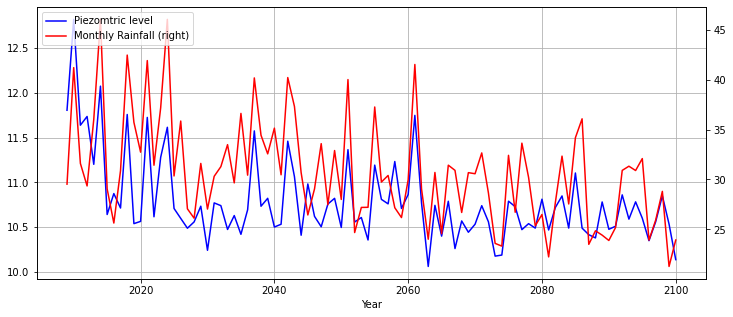

Ali et Med Bel Arbi


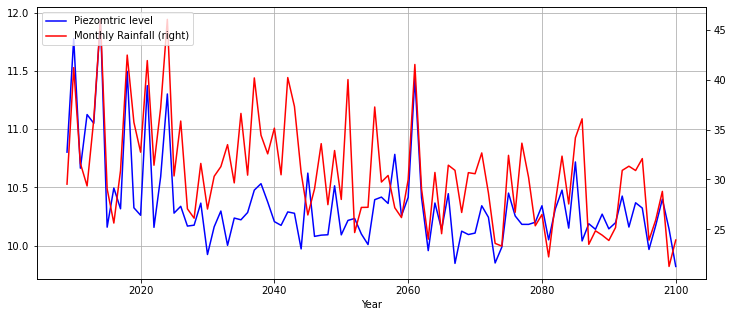

G.O.V.P.F


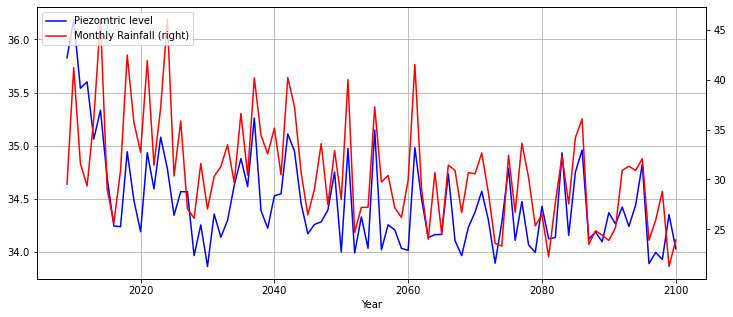

Usine Curamique


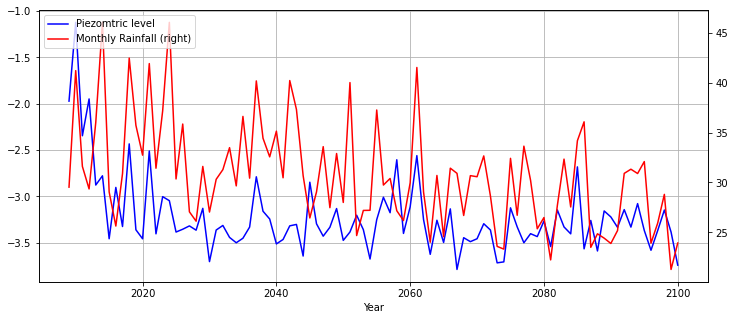

Puits Public_5779


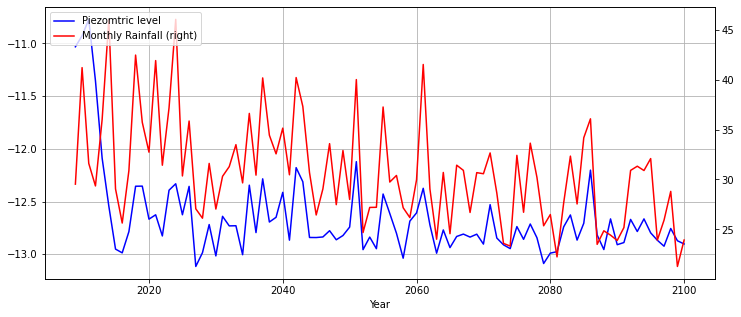

Azaiz ben Attia


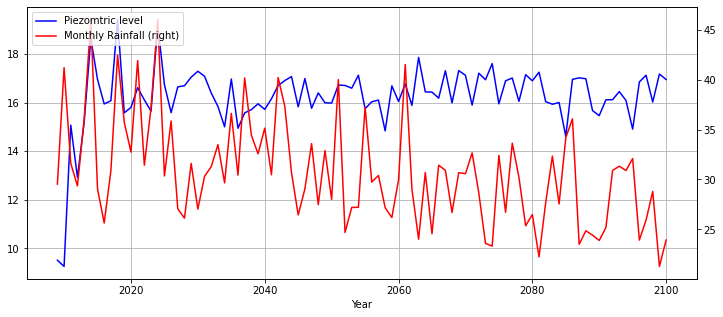

Ben Saad


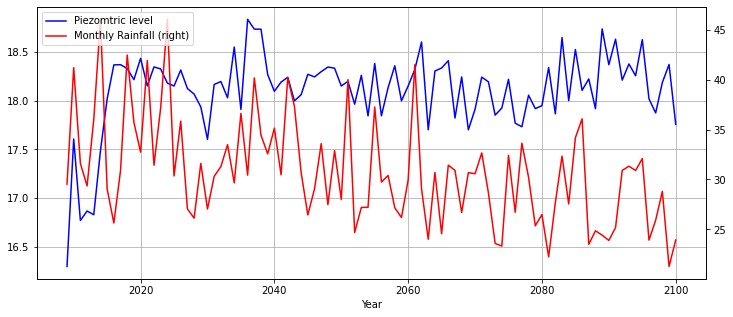

Sadok Belaid


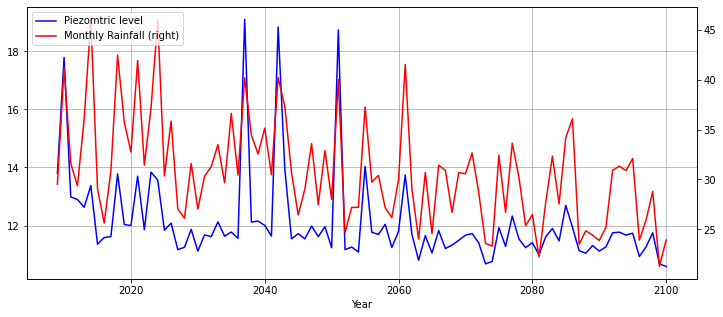

INRAT


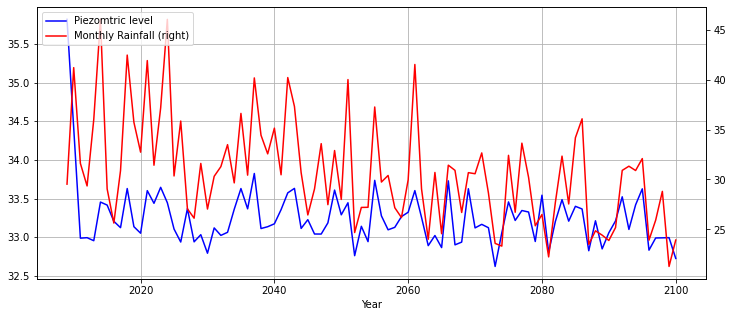

UCP Ennajah_494


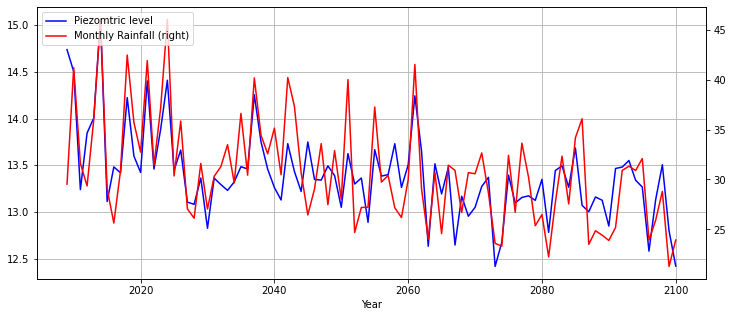

Mohamed ben Rouis


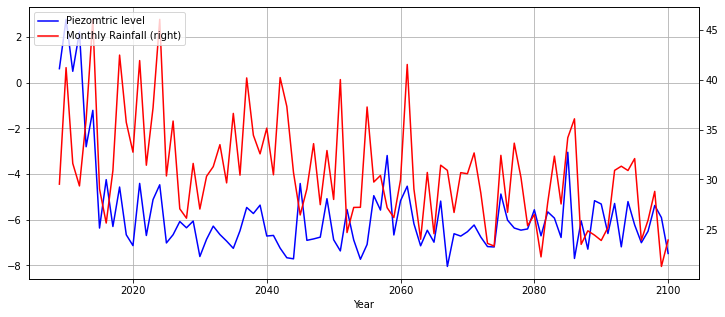

Ben Zazia


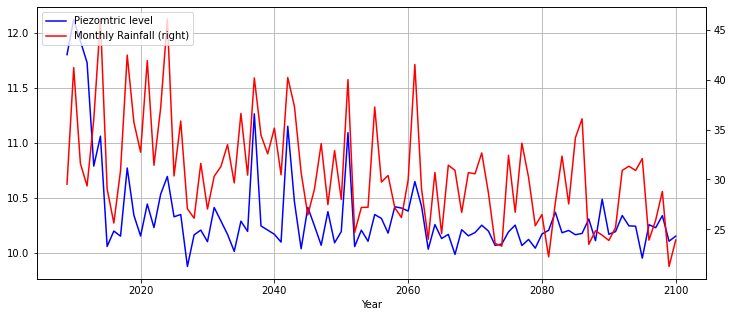

In [12]:
list_nom = list(set(RCP85['Piezometer']))
# plt.rcParams['font.size'] = '16'
for d in list_nom:
    df=RCP85[RCP85.Piezometer==d]
    print(d)
    df=df.reset_index()
    df.index=df.date
    plt.figure(figsize=(12,5))
    plt.xlabel('Number of requests every 10 minutes')

    ax1 = df.groupby('Year')['Pz'].mean().plot(color='blue', grid=True, label='Piezomtric level')
    ax2 = df.groupby('Year')['MonthlyRF'].mean().plot(color='red', grid=True, secondary_y=True, label='Monthly Rainfall')
    
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()


    plt.legend(h1+h2, l1+l2, loc=2)
    plt.show()